In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def parse_dataset(fp):
    '''
    Loads the dataset .txt file with label-tweet on each line and parses the dataset.
    :param fp: filepath of dataset
    :return:
        corpus: list of tweet strings of each tweet.
        y: list of labels
    '''
    y = []
    corpus = []
    with open(fp, 'rt') as data_in:
        for line in data_in:
            if not line.lower().startswith("tweet index"): # discard first line if it contains metadata
                line = line.rstrip() # remove trailing whitespace
                label = int(line.split("\t")[1])
                tweet = line.split("\t")[2]
                y.append(label)
                corpus.append(tweet)

    return corpus, y

In [27]:
tweets, labels = parse_dataset('datasets/train/SemEval2018-T3-train-taskA.txt')

In [29]:
data = pd.DataFrame({'Tweets': tweets, 'Labels':labels})
data[:10]

,Labels,Tweets
0,1,Sweet United Nations video. Just in time for C...
1,1,@mrdahl87 We are rumored to have talked to Erv...
2,1,Hey there! Nice to see you Minnesota/ND Winter...
3,0,3 episodes left I'm dying over here
4,1,"""I can't breathe!"" was chosen as the most nota..."
5,0,You're never too old for Footie Pajamas. http:...
6,1,Nothing makes me happier then getting on the h...
7,0,4:30 an opening my first beer now gonna be a l...
8,0,@Adam_Klug do you think you would support a gu...
9,0,@samcguigan544 You are not allowed to open tha...


In [31]:
ironic = data[data['Labels'] == 1]
non_ironic = data[data['Labels'] == 0]

print('Ironic shape', ironic.shape)
print('Non ironic shape', non_ironic.shape)

Ironic shape (1911, 2)
Non ironic shape (1923, 2)


In [32]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [33]:
def most_common_words(df, num=25):    
    words = ' '.join(df['Tweets']).lower().split()
    words_cleaned = [word for word in words if word not in stop]
    return pd.Series(words_cleaned).value_counts()[:num]


In [35]:
print('***** Ironic *****')
print(most_common_words(ironic))
print('***** Non-ironic *****')
print(most_common_words(non_ironic))

***** Ironic *****
love         160
i'm          113
like          94
great         83
get           81
day           79
people        61
good          60
can't         54
one           52
going         50
oh            48
time          48
really        48
know          46
see           46
work          46
christmas     43
thanks        43
fun           42
that's        41
&             41
well          40
way           39
much          38
dtype: int64
***** Non-ironic *****
i'm          91
get          80
&            72
like         71
-            57
one          55
would        52
think        45
new          44
day          44
love         44
know         42
need         41
go           39
see          39
still        39
can't        39
people       36
christmas    35
make         35
good         35
via          35
time         34
right        34
back         34
dtype: int64


In [39]:
def word_count(X=data, col='Tweets'):
    word_counts = list(map(lambda x: len(x), X[col].str.split(' ')))
    return word_counts

def plot_counts(counts):
    print('Min Count:', np.min(counts))
    print('Mean Count:', np.mean(counts))
    print('Max Count:', np.max(counts))
    sns.distplot(counts)
    plt.show()

Min Count: 1
Mean Count: 14.0195618153
Max Count: 33


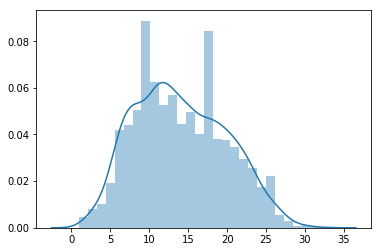

In [46]:
plot_counts(word_count())

In [72]:
words = np.concatenate(data['Tweets'].str.lower().str.split())
np.unique([word for word in words if word not in stop]).shape

(16920,)